# Air Quality Data in Colombia

_October, 2022_

This article dives through the data provided by Colombian environmental authority SISAIRE, about the air quality in the whole country from years 2011 to 2018
The datasetcan be [found here](https://www.datos.gov.co/Ambiente-y-Desarrollo-Sostenible/DATOS-DE-CALIDAD-DEL-AIRE-EN-COLOMBIA-2011-2018/ysq6-ri4e)

We're going to use `pandas`, `numpy`and `matplotlib` for this exploration

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [38]:
raw_air_quality = pd.read_csv(
    "DATOS_DE_CALIDAD_DEL_AIRE_EN_COLOMBIA_2011-2018.csv",
    low_memory=False
)

In [39]:
air_quality = raw_air_quality

## Quick look into the dataset

In [40]:
air_quality.head()

,Fecha,Autoridad Ambiental,Nombre de la estación,Tecnología,Latitud,Longitud,Código del departamento,Departamento,Código del municipio,Nombre del municipio,Tipo de estación,Tiempo de exposición,Variable,Unidades,Concentración,Nueva columna georreferenciada
0,09/04/2011 12:00:00 a. m.,AMVA,BAR-Hosp. S.V. Paul,Manual,6.436,-75.333431,5.0,ANTIOQUIA,5079.0,BARBOSA,Fija,24,PM10,µg/m3,55.57,"(6.436, -75.333431)"
1,13/04/2011 12:00:00 a. m.,AMVA,BAR-Hosp. S.V. Paul,Manual,6.436,-75.333431,5.0,ANTIOQUIA,5079.0,BARBOSA,Fija,24,PM10,µg/m3,30.81,"(6.436, -75.333431)"
2,15/04/2011 12:00:00 a. m.,AMVA,BAR-Hosp. S.V. Paul,Manual,6.436,-75.333431,5.0,ANTIOQUIA,5079.0,BARBOSA,Fija,24,PM10,µg/m3,21.01,"(6.436, -75.333431)"
3,18/04/2011 12:00:00 a. m.,AMVA,BAR-Hosp. S.V. Paul,Manual,6.436,-75.333431,5.0,ANTIOQUIA,5079.0,BARBOSA,Fija,24,PM10,µg/m3,30.73,"(6.436, -75.333431)"
4,20/04/2011 12:00:00 a. m.,AMVA,BAR-Hosp. S.V. Paul,Manual,6.436,-75.333431,5.0,ANTIOQUIA,5079.0,BARBOSA,Fija,24,PM10,µg/m3,24.72,"(6.436, -75.333431)"


Let's rename the column names first to play easier with them

In [41]:
air_quality = air_quality.rename(
    columns = {
        "Fecha": "date",
        "Autoridad Ambiental": "env_authority",
        "Nombre de la estación": "station_name",
        "Tecnología": "technology_type",
        "Latitud": "latitude",
        "Longitud": "longitude",
        "Código del departamento": "department_code",
        "Departamento": "department_name",
        "Código del municipio": "city_code",
        "Nombre del municipio": "city_name",
        "Tipo de estación": "station_type",
        "Tiempo de exposición": "exposition_time",
        "Variable": "variable",
        "Unidades": "units",
        "Concentración": "concentration",
        "Nueva columna georreferenciada": "coordinates"
    }
)

Here is a quick description of what the columns mean, taken from the [data source](https://www.datos.gov.co/Ambiente-y-Desarrollo-Sostenible/DATOS-DE-CALIDAD-DEL-AIRE-EN-COLOMBIA-2011-2018/ysq6-ri4e):

| name      | Description |
| ----------- | ----------- |
| `date`      | Date when the measurement was made |
| `env_authority`   | Environmental Authority whose jurisdiction covers the location of the monitoring station |
| `station_name`   | Name that identifies the monitoring station |
| `technology_type`   | It specifies the technology of the equipment that made the measurement in the monitoring station |
| `latitude`   | location's latitude of the monitoring station |
| `longitude`   | location's longitude of the monitoring station |
| `department_code`   | Department identifier code provided by Colombia's DANE. In Colombia, departments are the 1st order administrative division, they can be analogous to states or provinces in other countries |
| `department_name`   | Department's name |
| `city_code`   | Department's name |
| **TBD**   | Me dió pereza, luego lo termino |


### What environmental authorities do we have?

Below is the non-empty count of rows grouped by environmental authority in the dataset

In [42]:
air_quality.pivot_table(
    values = "concentration",
    index = "env_authority",
    aggfunc = "count",
    margins = True
)

,concentration
env_authority,
AMB,96635
AMVA,5948814
CAM,1612
CAR,334408
CARDER,3800
CDMB,1301959
CODECHOCÓ,84
CORANTIOQUIA,194189
CORMACARENA,183256


### What variables were reported?

Below is the non-empty count of rows for each variable and units in the dataset

air_quality.pivot_table(
    values = "concentration",
    index = ["variable", "units"],
    aggfunc = "count",
    margins = True
)

Looks like there is room for some cleaning of the `units` column. Values like "ugm3" and "µg/m3" really mean the same, or "%" and "perc". Let's fix that

#### Fixing units

In [43]:
def fix_units(unit):
    if unit == "ugm3":
        return "µg/m3"
    elif unit == "°":
        return "deg"
    elif unit == "perc":
        return "%"
    elif unit == "mm Hg":
        return "mmHg"
    elif unit == "Wm2":
        return "W/m2"
    elif unit == "MEDh":
        return "MED/h"
    elif unit == "Celsius":
        return "°C"
    elif unit == "ms":
        return "m/s"
    else:
        return unit

In [44]:
air_quality["units"] = air_quality["units"].apply(fix_units)

In [45]:
air_quality.pivot_table(
    values = "concentration",
    index = ["variable", "units"],
    aggfunc = "count",
    margins = True
)

,,concentration
variable,units,
CO,µg/m3,877028
Dirección del Viento,deg,1731462
Humedad Relativa,%,59436
Humedad Relativa 10 m,%,647808
Humedad Relativa 2 m,%,753078
NO,µg/m3,743813
NO2,µg/m3,941200
O3,µg/m3,1619847
PM10,µg/m3,2171311


Now it looks more homogeneous

#### How much data do we have per department?

In [46]:
air_quality.pivot_table(
    values = "concentration",
    index = ["department_name"],
    aggfunc = "count",
    margins = True
)

,concentration
department_name,
ANTIOQUIA,6147082
ARAUCA,4760
ATLÁNTICO,349552
BOLÍVAR,174173
BOYACÁ,806501
CALDAS,3955
CASANARE,4760
CAUCA,3577
CESAR,168432


## Temperature Analysis

In [51]:
temperatures = air_quality[air_quality["variable"] == "Temperatura"]
temperatures = temperatures.drop(columns = ["variable", "units"])
temperatures = temperatures.rename(columns = { "concentration": "temp_c" })
temperatures = temperatures.set_index(["date"])
temperatures = temperatures.sort_index()

temperatures.head()

,env_authority,station_name,technology_type,latitude,longitude,department_code,department_name,city_code,city_name,station_type,exposition_time,temp_c,coordinates
date,,,,,,,,,,,,,
01/01/2012 01:00:00 a. m.,AMVA,SAB-Centro Adtvo.,Automática,6.153472,-75.619556,5.0,ANTIOQUIA,5631.0,SABANETA,Fija,1,20.0229,"(6.153472, -75.619556)"
01/01/2012 01:00:00 p. m.,AMVA,SAB-Centro Adtvo.,Automática,6.153472,-75.619556,5.0,ANTIOQUIA,5631.0,SABANETA,Fija,1,27.8121,"(6.153472, -75.619556)"
01/01/2012 02:00:00 a. m.,AMVA,SAB-Centro Adtvo.,Automática,6.153472,-75.619556,5.0,ANTIOQUIA,5631.0,SABANETA,Fija,1,19.7811,"(6.153472, -75.619556)"
01/01/2012 02:00:00 p. m.,AMVA,SAB-Centro Adtvo.,Automática,6.153472,-75.619556,5.0,ANTIOQUIA,5631.0,SABANETA,Fija,1,29.1116,"(6.153472, -75.619556)"
01/01/2012 03:00:00 a. m.,AMVA,SAB-Centro Adtvo.,Automática,6.153472,-75.619556,5.0,ANTIOQUIA,5631.0,SABANETA,Fija,1,19.7676,"(6.153472, -75.619556)"


Quick look at the overall temperature values

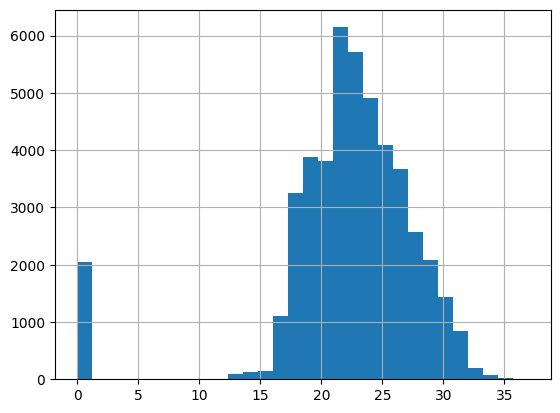

In [58]:
plt.clf()
temperatures["temp_c"].hist(bins = 30)
plt.show()

There are some data points with temperature 0 or close to 0. We'll need to investigate that more just in case they're outliers or missing data

In [69]:
very_low_temps = temperatures[temperatures["temp_c"] < 5]
very_low_temps.head()

,env_authority,station_name,technology_type,latitude,longitude,department_code,department_name,city_code,city_name,station_type,exposition_time,temp_c,coordinates
date,,,,,,,,,,,,,
01/02/2018 00:00,CORMACARENA,Cofrem,NaN,4.1475,-73.621389,50.0,META,50001.0,VILLAVICENCIO,Fija,24,0.0,"(4.1475, -73.621389)"
01/02/2018 00:00,CORMACARENA,Cofrem,NaN,4.1475,-73.621389,50.0,META,50001.0,VILLAVICENCIO,Fija,1,0.0,"(4.1475, -73.621389)"
01/02/2018 01:00,CORMACARENA,Cofrem,NaN,4.1475,-73.621389,50.0,META,50001.0,VILLAVICENCIO,Fija,1,0.0,"(4.1475, -73.621389)"
01/02/2018 02:00,CORMACARENA,Cofrem,NaN,4.1475,-73.621389,50.0,META,50001.0,VILLAVICENCIO,Fija,1,0.0,"(4.1475, -73.621389)"
01/02/2018 03:00,CORMACARENA,Cofrem,NaN,4.1475,-73.621389,50.0,META,50001.0,VILLAVICENCIO,Fija,1,0.0,"(4.1475, -73.621389)"


It's interesting that the `technology_type` is NaN for the first elements. Let's see from which departments these temperatures come from and all their technology types

In [68]:
very_low_temps.groupby(["department_name", "station_name", "technology_type"], dropna = False)["temp_c"].count()

department_name  station_name  technology_type
META             Catumare      Automática          109
                               NaN                  38
                 Cofrem        Automática           40
                               NaN                1718
                 La Esmeralda  NaN                 138
Name: temp_c, dtype: int64

All temperatures reported as 0 or very close to 0 come from Meta department, specifically 2 stations, some of them with an Automatic technology type but most of them don't report the technology type either. It is very likely that these are missing values. Will drop them from the base temperatures dataset to exclude them from the analysis

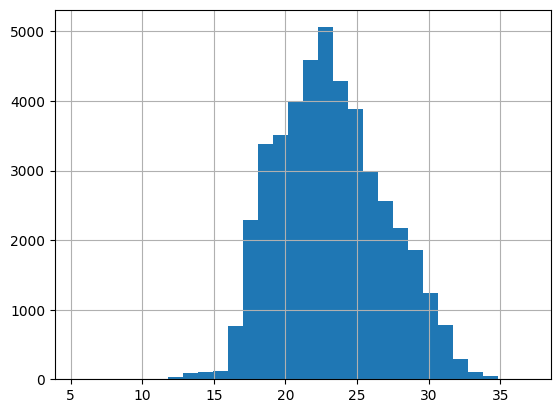

In [80]:
temperatures = temperatures[temperatures["temp_c"] > 5]

plt.clf()
temperatures["temp_c"].hist(bins = 30)
plt.show()

### Average temperature over time

#### In the country

In [81]:
temperatures["date"]

KeyError: 'date'

#### By department

#### Geospatially

## Wind Analysis

### Distribution of wind direction and speed geospatially

## Particles Analysis

### Average PM10, PM2.5 and PST over time